# Quantum Walks

Following the example from class for creating the quantum walk operator for the case of a circle with 4 nodes, design the quantum walk operator for the case of a line with 16 nodes.

Lecture: https://www.youtube.com/watch?v=kHJLwfDUSWI&list=PL_wGNAk5B0pXq98BJBKsbNH2Qjp1lk8dG&index=32

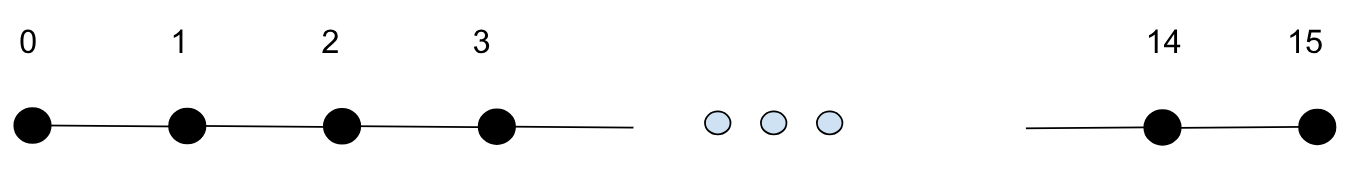

In [1]:
from classiq import *

In [6]:
size = 4 # number of qubits to represent 16 vertices

Quantum walks are the quantum analogs of classical random walks, used in quantum computing and quantum algorithms. In a classical random walk, a particle moves randomly to adjacent positions based on some probability distribution, such as flipping a coin to decide the direction. This randomness leads to a diffusion-like spread over time. Quantum walks, however, leverage quantum superposition and interference. Instead of moving to one position, a quantum walker can exist in multiple positions simultaneously. Quantum walks can therefore explore a larger state space more efficiently than classical random walks. This efficiency makes them particularly useful in designing quantum algorithms for tasks like searching unsorted databases, solving graph traversal problems, and simulating quantum systems. Quantum walks can achieve quadratic speedup in search problems compared to classical algorithms.

## C(oin) or W operator

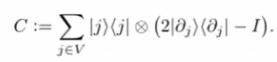 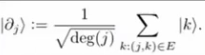

In [12]:
@qfunc
def prepare_minus(x: QBit):
  X(x)
  H(x)


@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
  aux^=(x!=0)


@qfunc
def zero_diffuzer(x: QNum):
  aux = QNum('aux')
  allocate(1,aux)
  within_apply(compute=lambda: prepare_minus(aux),action=lambda: diffuzer_oracle)


def W_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
  prob = [0] * 2**size
  if i == 0: # first node has one connection
    prob[i+1] = 1.0
  elif i == (2**size) - 1: # last node has one connection
    prob[i-1] = 1.0
  else: # middle nodes have 2 connections
    prob[i-1] = 0.5
    prob[i+1] = 0.5
  print(f'State={i}, prob vec ={prob}')
  
  control(ctrl=vertices==i,
          operand=lambda: within_apply(
            compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
            action= lambda: zero_diffuzer(adjacent_vertices)
          )
        )


@qfunc 
def W_operator(vertices:QNum, adjacent_vertices: QNum):
  for i in range(2**size):
    W_iteration(i,vertices,adjacent_vertices)

## S(hift) operator

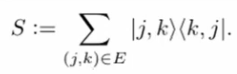

In [13]:
@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
  res |= (((vertices - adjacent_vertices) == 1) | ((vertices - adjacent_vertices) == -1))


@qfunc 
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
  repeat(count= x.len,iteration= lambda i: SWAP(x[i],y[i]))
  

@qfunc 
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,operand= lambda: bitwise_swap(vertices,adjacent_vertices))

## Simulate Quantum Walk

In [14]:
@qfunc
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size, vertices)
  hadamard_transform(vertices)
  allocate(size, adjacent_vertices)

  W_operator(vertices, adjacent_vertices)
  S_operator(vertices, adjacent_vertices)

In [15]:
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

State=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0

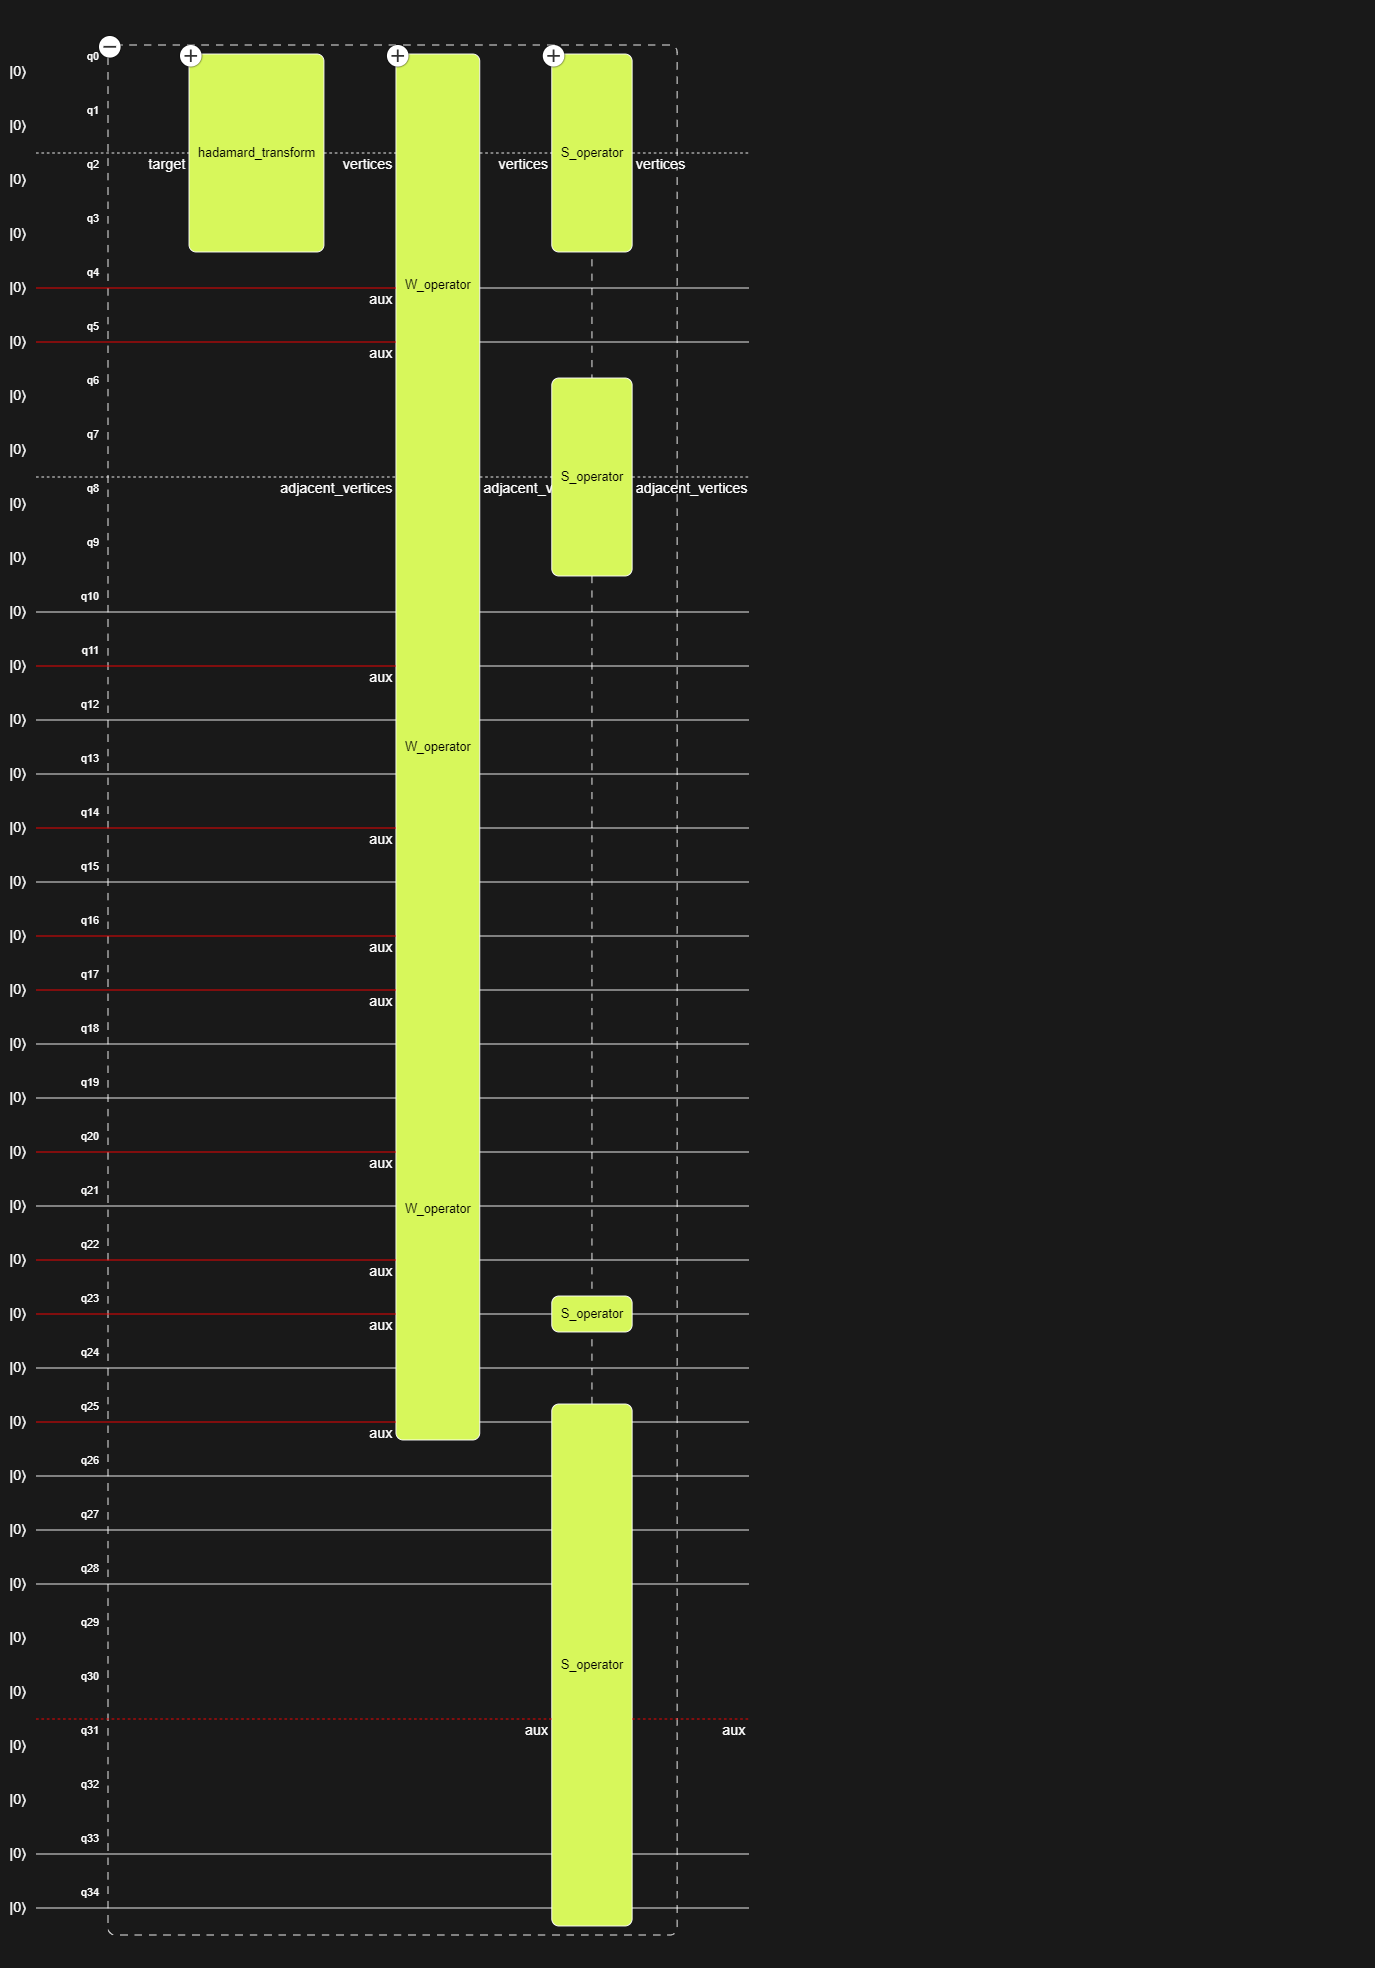